In [0]:
%matplotlib inline
!pip install category_encoders
from google.colab import drive
import os
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/AML")
pd.set_option('display.max_rows', 20)


     |████████████████████████████████| 102kB 9.1MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
from keras.utils import to_categorical
from keras.layers import Dense, BatchNormalization, Dropout, Activation
from keras.models import Sequential
from keras.datasets import fashion_mnist

In [0]:
tmp=fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
(X_train, y_train) = tmp[0]

In [0]:
(X_test, y_test) = tmp[1]

In [0]:
y_train.shape

(60000,)

In [0]:
y_test_n=to_categorical(y_test, cls)
y_train_n=to_categorical(y_train, cls)

In [0]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_train=X_train.astype('float64')
X_train=X_train/255

In [0]:
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
X_test=X_test.astype('float64')
X_test=X_test/255

In [0]:
cls=len(np.unique(y_train))
print(cls)

10


In [0]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=10000, random_state=1)
sss.get_n_splits(X_train, y_train_n)

1

In [0]:
for train_index, test_index in sss.split(X_train, y_train_n):
  X_train_new, X_val_new = X_train[train_index], X_train[test_index]
  y_train_new_n, y_val_new_n = y_train_n[train_index], y_train_n[test_index]


In [0]:
inp=X_train_new[0].shape

Baseline dense model

In [0]:
def build_model(neurons=32, l2_val=0.1):
  inp=X_train[0].shape
  model=Sequential([Dense(neurons,activation='relu',kernel_regularizer=l2(l=l2_val), input_shape=inp),Dense(neurons,activation='relu',kernel_regularizer=l2(l=l2_val)), Dense(cls,activation='softmax',kernel_regularizer=l2(l=l2_val)) ])
  model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model_mlp1=build_model(neurons=64,l2_val= 0.001)

In [0]:
l_curve=model_mlp1.fit(X_train_new, y_train_new_n, epochs=50, validation_data=(X_val_new, y_val_new_n))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.6896 - accuracy: 0.8084 - val_loss: 0.5630 - val_accuracy: 0.8475
Epoch 2/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.5463 - accuracy: 0.8481 - val_loss: 0.5503 - val_accuracy: 0.8458
Epoch 3/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.5214 - accuracy: 0.8530 - val_loss: 0.5001 - val_accuracy: 0.8615
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.5033 - accuracy: 0.8593 - val_loss: 0.4984 - val_accuracy: 0.8610
Epoch 5/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.4932 - accuracy: 0.8612 - val_loss: 0.4923 - val_accuracy: 0.8651
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.4864 - accuracy: 0.8639 - val_loss: 0.4908 - val_accuracy: 0.8628
Epoch 7/50
50000/50000 [==============================] - 5s 99u

In [0]:
arr=l_curve.history
df=pd.DataFrame(arr)


In [0]:
df.head()

,val_loss,val_accuracy,loss,accuracy
0,0.562982,0.8475,0.689602,0.80844
1,0.550337,0.8458,0.546301,0.84814
2,0.500095,0.8615,0.521421,0.85304
3,0.498431,0.8610,0.503305,0.85926
4,0.492262,0.8651,0.493208,0.86122


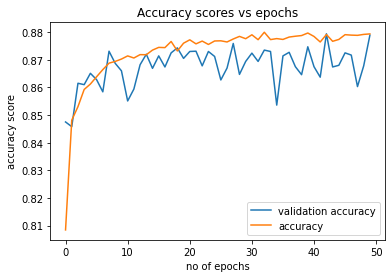

<Figure size 4320x720 with 0 Axes>

In [0]:

plt.plot(df['val_accuracy'], label='validation accuracy')
plt.plot(df['accuracy'], label='accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no of epochs')
plt.title('Accuracy scores vs epochs')
plt.legend(loc="lower right")
plt.figure(figsize=(60,10))
plt.show()

Dense model with only dropout

In [0]:
def build_model2(neurons=32, l2_val=0.1):
  inp=X_train[0].shape
  model=Sequential([Dense(neurons,activation='relu',kernel_regularizer=l2(l=l2_val), input_shape=inp),Dropout(0.4), Dense(neurons,activation='relu',kernel_regularizer=l2(l=l2_val)), Dropout(0.4), Dense(cls,activation='softmax',kernel_regularizer=l2(l=l2_val)) ])
  model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model_mlp2=build_model2(neurons=64,l2_val= 0.001)

In [0]:
l_curve2=model_mlp2.fit(X_train_new, y_train_new_n, epochs=50, validation_data=(X_val_new, y_val_new_n))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.9667 - accuracy: 0.7096 - val_loss: 0.6262 - val_accuracy: 0.8246
Epoch 2/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.7349 - accuracy: 0.7902 - val_loss: 0.5826 - val_accuracy: 0.8344
Epoch 3/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.7008 - accuracy: 0.8034 - val_loss: 0.5634 - val_accuracy: 0.8424
Epoch 4/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.6861 - accuracy: 0.8070 - val_loss: 0.5565 - val_accuracy: 0.8409
Epoch 5/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.6693 - accuracy: 0.8090 - val_loss: 0.5487 - val_accuracy: 0.8497
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.6670 - accuracy: 0.8085 - val_loss: 0.5620 - val_accuracy: 0.8425
Epoch 7/50
50000/50000 [==============================] - 6s 1

In [0]:
model_mlp2.evaluate(X_val_new, y_val_new_n)

10000/10000 [==============================] - 1s 56us/step


[0.5410155549049377, 0.8463000059127808]

In [0]:
arr=l_curve2.history
df=pd.DataFrame(arr)

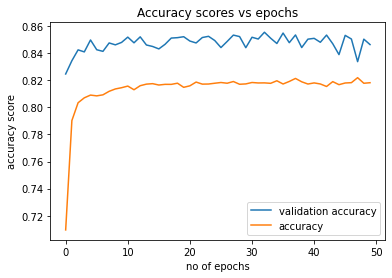

<Figure size 4320x720 with 0 Axes>

In [0]:
plt.plot(df['val_accuracy'], label='validation accuracy')
plt.plot(df['accuracy'], label='accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no of epochs')
plt.title('Accuracy scores vs epochs')
plt.legend(loc="lower right")
plt.figure(figsize=(60,10))
plt.show()

Trying another network architecture with Batch Norm and dropout

In [0]:
def build_model3(neurons=32, l2_val=0.1):
  inp=X_train[0].shape
  model=Sequential([Dense(neurons,activation='relu',kernel_regularizer=l2(l=l2_val), input_shape=inp),Dropout(0.4), Dense(neurons,activation='relu',kernel_regularizer=l2(l=l2_val)), Dropout(0.4), Dense(neurons,activation='relu',kernel_regularizer=l2(l=l2_val)), Dropout(0.4),Dense(cls,activation='softmax',kernel_regularizer=l2(l=l2_val)) ])
  model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model_mlp3=build_model3(neurons=512,l2_val= 0.001)

In [0]:
model_mlp3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

In [0]:
l_curve2=model_mlp3.fit(X_train_new, y_train_new_n, epochs=50, validation_data=(X_val_new, y_val_new_n))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.9696 - accuracy: 0.7281 - val_loss: 0.6297 - val_accuracy: 0.8245
Epoch 2/50
50000/50000 [==============================] - 9s 170us/step - loss: 0.7171 - accuracy: 0.7966 - val_loss: 0.5804 - val_accuracy: 0.8376
Epoch 3/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.6691 - accuracy: 0.8053 - val_loss: 0.5949 - val_accuracy: 0.8169
Epoch 4/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.6484 - accuracy: 0.8071 - val_loss: 0.5187 - val_accuracy: 0.8441
Epoch 5/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.6466 - accuracy: 0.8073 - val_loss: 0.5202 - val_accuracy: 0.8422
Epoch 6/50
50000/50000 [==============================] - 8s 169us/step - loss: 0.6261 - accuracy: 0.8133 - val_loss: 0.5391 - val_accuracy: 0.8385
Epoch 7/50
50000/50000 [==============================] - 8s 1

In [0]:
model_mlp3.evaluate(X_val_new, y_val_new_n)

10000/10000 [==============================] - 1s 67us/step


[0.5056728974342346, 0.8442000150680542]

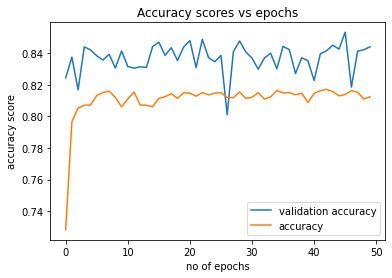

<Figure size 4320x720 with 0 Axes>

In [0]:
arr=l_curve2.history
df=pd.DataFrame(arr)
plt.plot(df['val_accuracy'], label='validation accuracy')
plt.plot(df['accuracy'], label='accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no of epochs')
plt.title('Accuracy scores vs epochs')
plt.legend(loc="lower right")
plt.figure(figsize=(60,10))
plt.show()

Using Batch normalization, dropout layers on the neural net

In [0]:
def build_modelb1(neurons=32, l2_val=0.1):
  inp=X_train[0].shape
  model=Sequential([Dense(neurons,kernel_regularizer=l2(l=l2_val), input_shape=inp),BatchNormalization(), Activation('relu') ,Dropout(0.4), Dense(neurons,kernel_regularizer=l2(l=l2_val)), BatchNormalization(), Activation('relu'), Dropout(0.4), Dense(cls,activation='softmax',kernel_regularizer=l2(l=l2_val)) ])
  model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model_mlp4=build_modelb1(neurons=64,l2_val= 0.001)

In [0]:
l_curve2=model_mlp4.fit(X_train_new, y_train_new_n, epochs=50, validation_data=(X_val_new, y_val_new_n))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.9726 - accuracy: 0.7268 - val_loss: 0.6186 - val_accuracy: 0.8312
Epoch 2/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.7396 - accuracy: 0.7915 - val_loss: 0.5952 - val_accuracy: 0.8264
Epoch 3/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.6934 - accuracy: 0.8013 - val_loss: 0.5554 - val_accuracy: 0.8434
Epoch 4/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.6697 - accuracy: 0.8081 - val_loss: 0.5322 - val_accuracy: 0.8455
Epoch 5/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.6599 - accuracy: 0.8074 - val_loss: 0.5401 - val_accuracy: 0.8452
Epoch 6/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.6506 - accuracy: 0.8113 - val_loss: 0.5482 - val_accuracy: 0.8339
Epoch 7/50
50000/50000 [==============================] - 9s 1

In [0]:
model_mlp4.evaluate(X_val_new, y_val_new_n)

10000/10000 [==============================] - 1s 67us/step


[0.4993783054828644, 0.8579000234603882]

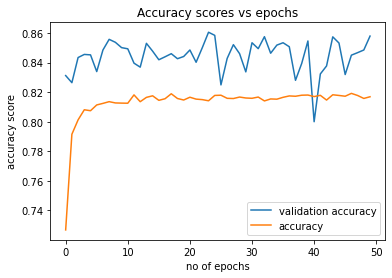

<Figure size 4320x720 with 0 Axes>

In [0]:
arr=l_curve2.history
df=pd.DataFrame(arr)
plt.plot(df['val_accuracy'], label='validation accuracy')
plt.plot(df['accuracy'], label='accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no of epochs')
plt.title('Accuracy scores vs epochs')
plt.legend(loc="lower right")
plt.figure(figsize=(60,10))
plt.show()

Applying Batch Normalization and Dropout on a bigger network

In [0]:
def build_modelb2(neurons=32, l2_val=0.1):
  inp=X_train[0].shape
  model=Sequential([Dense(neurons,kernel_regularizer=l2(l=l2_val), input_shape=inp),BatchNormalization(), Activation('relu') ,Dropout(0.4), Dense(neurons,kernel_regularizer=l2(l=l2_val)), BatchNormalization(), Activation('relu'), Dropout(0.4), Dense(neurons,kernel_regularizer=l2(l=l2_val)), BatchNormalization(), Activation('relu'), Dropout(0.4), Dense(cls,activation='softmax',kernel_regularizer=l2(l=l2_val)) ])
  model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model_mlp5=build_modelb2(neurons=512,l2_val= 0.001)

In [0]:
l_curve2=model_mlp5.fit(X_train_new, y_train_new_n, epochs=100, validation_data=(X_val_new, y_val_new_n))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 227us/step - loss: 1.6467 - accuracy: 0.7746 - val_loss: 1.0026 - val_accuracy: 0.8249
Epoch 2/100
50000/50000 [==============================] - 11s 213us/step - loss: 0.9508 - accuracy: 0.8027 - val_loss: 0.8685 - val_accuracy: 0.7947
Epoch 3/100
50000/50000 [==============================] - 11s 223us/step - loss: 0.8973 - accuracy: 0.8044 - val_loss: 0.9084 - val_accuracy: 0.7949
Epoch 4/100
50000/50000 [==============================] - 11s 227us/step - loss: 0.8904 - accuracy: 0.8038 - val_loss: 0.8289 - val_accuracy: 0.8167
Epoch 5/100
50000/50000 [==============================] - 11s 223us/step - loss: 0.8770 - accuracy: 0.8062 - val_loss: 0.9079 - val_accuracy: 0.7926
Epoch 6/100
50000/50000 [==============================] - 11s 227us/step - loss: 0.8718 - accuracy: 0.8053 - val_loss: 0.8329 - val_accuracy: 0.7939
Epoch 7/100
50000/50000 [=========================

In [0]:
model_mlp5.evaluate(X_val_new, y_val_new_n)

10000/10000 [==============================] - 1s 71us/step


[0.603425668811798, 0.848800003528595]

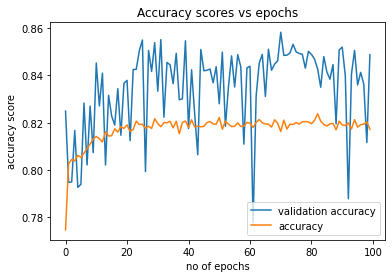

<Figure size 4320x720 with 0 Axes>

In [0]:
arr=l_curve2.history
df=pd.DataFrame(arr)
plt.plot(df['val_accuracy'], label='validation accuracy')
plt.plot(df['accuracy'], label='accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no of epochs')
plt.title('Accuracy scores vs epochs')
plt.legend(loc="lower right")
plt.figure(figsize=(60,10))
plt.show()

On the basis of the learning curves and evaluation scores on the validation set, we see that all the models provide ~ 0.85 on the validation set, so we can pick the bigger network with dropout and batch normalization as our model of choice, as it would be more robust to generalizing to other datasets.